In [252]:
%matplotlib inline
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp

In [253]:
# henter ut gray channel
@pims.pipeline
def gray(image):
    return image[:, :, 1]

In [254]:
# lagrer avi fil i variabel
avi_file = "TrackingData/A_DF_40x_15s_5fps_1_cropped-1.avi"

In [255]:
# pims.Video henter avi fil, og bruker gray() til gray channel
frames = gray(pims.open(avi_file))

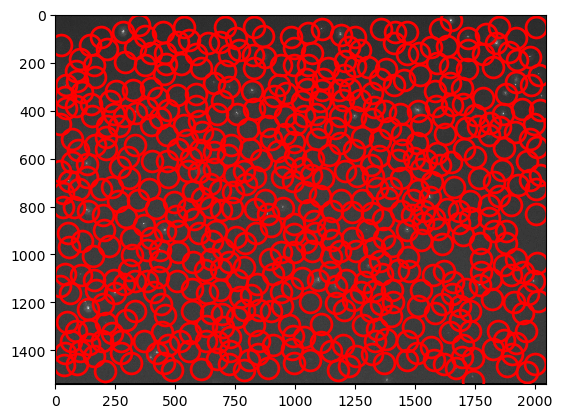

<AxesSubplot:>

In [256]:
f = tp.locate(frames[0], 43)
tp.annotate(f, frames[0])

(array([437.,  64.,   7.,   3.,   8.,   6.,   7.,   4.,   5.,   4.,   0.,
          1.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  605.09255043,  1402.4401983 ,  2199.78784618,  2997.13549405,
         3794.48314192,  4591.83078979,  5389.17843766,  6186.52608553,
         6983.8737334 ,  7781.22138127,  8578.56902914,  9375.91667701,
        10173.26432488, 10970.61197275, 11767.95962062, 12565.30726849,
        13362.65491636, 14160.00256423, 14957.3502121 , 15754.69785997,
        16552.04550785]),
 <BarContainer object of 20 artists>)

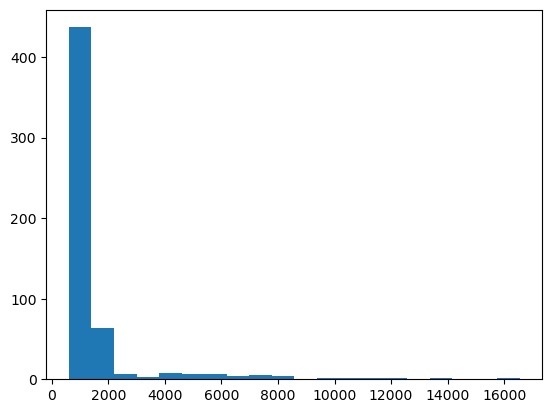

In [257]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

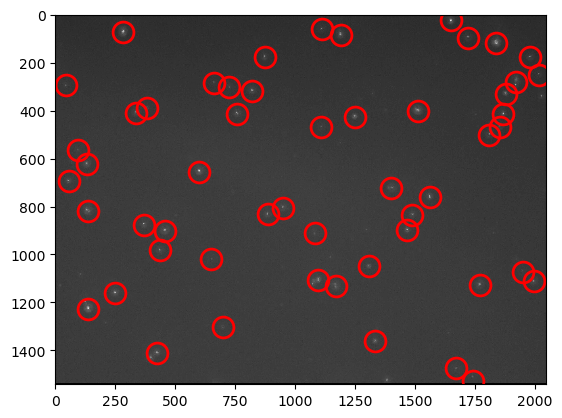

<AxesSubplot:>

In [258]:
f = tp.locate(frames[0], 43, minmass=2000)
tp.annotate(f, frames[0])

In [259]:
f = tp.batch(frames[:], 43, minmass = 2000)

In [260]:
t = tp.link(f, 5, memory=3)
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,21.096586,1650.802660,16552.045508,11.022316,0.370623,129.336631,74193.0,NaN,0,0
29,759.354353,1562.397746,7246.908936,6.719608,0.193291,88.760433,80665.0,NaN,0,1
30,804.352228,950.682115,4268.108811,7.834647,0.068600,74.558764,79763.0,NaN,0,2
31,817.791698,135.203059,8222.766494,8.226496,0.279945,73.544359,87435.0,NaN,0,3
32,832.915772,885.805257,4534.390110,6.704668,0.087818,58.835487,79004.0,NaN,0,4


In [261]:
t1 = tp.filter_stubs(t, 25)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 1212
After: 26


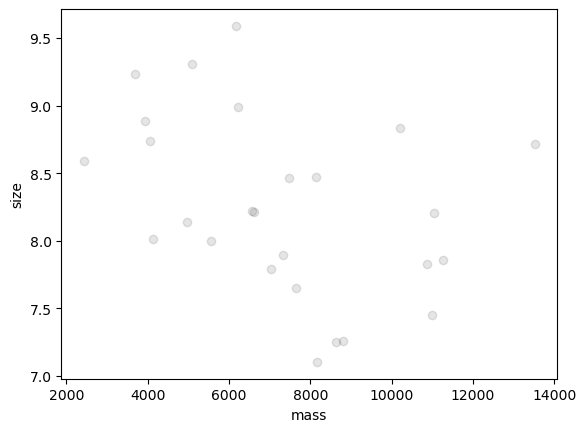

<AxesSubplot:xlabel='mass', ylabel='size'>

In [262]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

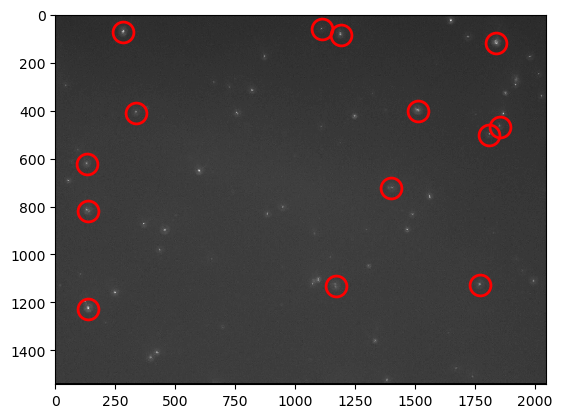

<AxesSubplot:>

In [263]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 10) & (t1['ecc'] < 3))]
plt.figure()
tp.annotate(t2[t2['frame']==0], frames[0])

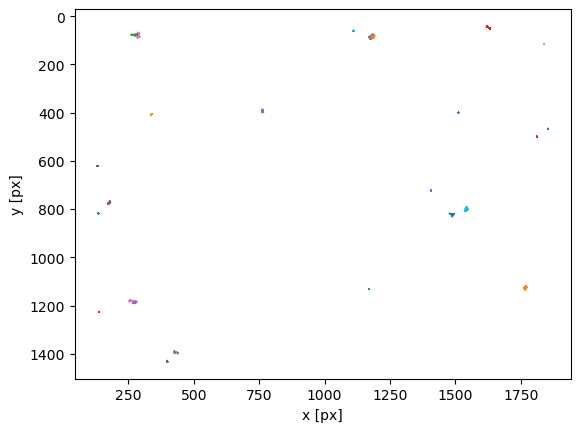

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [264]:
plt.figure()
tp.plot_traj(t2)

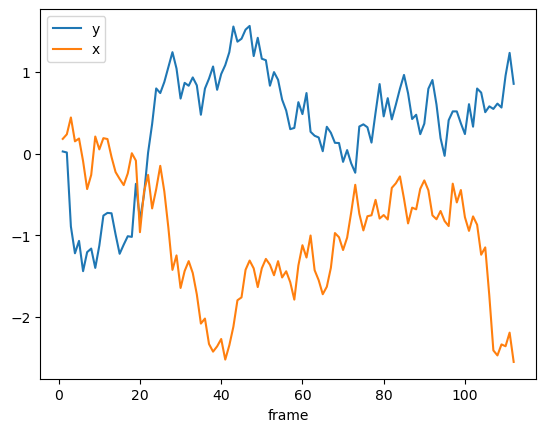

In [265]:
d = tp.compute_drift(t2)
d.plot()
plt.show()

In [266]:
# im = tp.imsd(tm, 100/285., 5)
# fig, ax = plt.subplots()
# ax.plot(im.index, im, 'k-', alpha=0.1)
# ax.set_xscale('log')
# ax.set_yscale('log')

/home/fredrik/.local/lib/python3.10/site-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/home/fredrik/.local/lib/python3.10/site-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


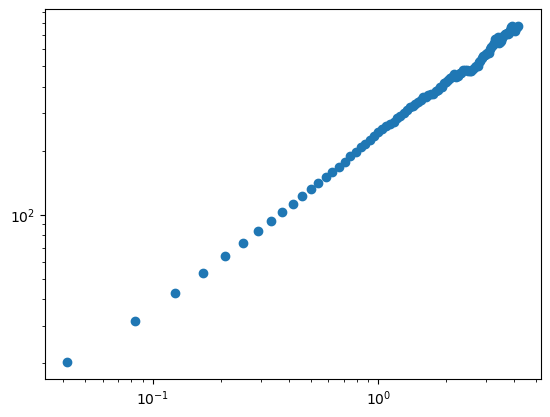

In [271]:
em = tp.emsd(tm, 1, 24)
fig, ax = plt.subplots()
ax.plot(em.index,em,'o')
ax.set_xscale('log')
ax.set_yscale('log')

InvalidIndexError: (slice(None, None, None), None)

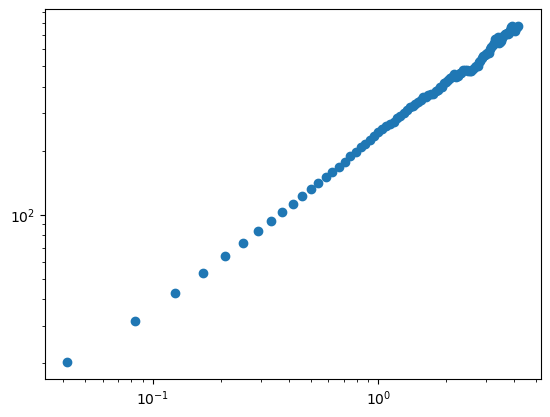

In [272]:
plt.figure()
tp.utils.fit_powerlaw(em)